In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("D:\Capstone\Databases\ML CSV\CUDB\Refined\power_energy\power_energy_github_cu01-cu35.csv")

In [ ]:
df.head()

,b_power_git,energy_git,rhythm
0,0.0019,152.1384,0
1,0.0028,138.9024,0
2,0.0015,115.8414,0
3,0.0017,122.3223,0
4,0.0026,129.3084,0


In [ ]:
df.isnull().sum()

b_power_git    0
energy_git     0
rhythm         0
dtype: int64

In [ ]:
# Separate the data into two classes
class_0 = df[df["rhythm"] == 0]
class_1 = df[df["rhythm"] == 1]

# Undersample class 0 to match the number of samples in class 1
class_0_undersampled = class_0.sample(n=len(class_1), random_state=42)

# Concatenate the undersampled class 0 with class 1
balanced_df = pd.concat([class_0_undersampled, class_1])

# Shuffle the concatenated DataFrame to mix the rows
#balanced_df = balanced_df.sample(frac=1, random_state=100)

In [ ]:
print(balanced_df['rhythm'].value_counts())

rhythm
0    749
1    749
Name: count, dtype: int64


In [ ]:
X = balanced_df.iloc[:, :-1]
y = balanced_df.iloc[:, -1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 100)

In [ ]:
X_test.shape, X_train.shape, y_test.shape , y_train.shape

((300, 2), (1198, 2), (300,), (1198,))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
clf.feature_importances_

array([0.4862644, 0.5137356])

In [ ]:
X_train.columns

Index(['b_power_git', 'energy_git'], dtype='object')

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[128,  30],
       [ 24, 118]], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.82

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       152
           1       0.83      0.80      0.81       148

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



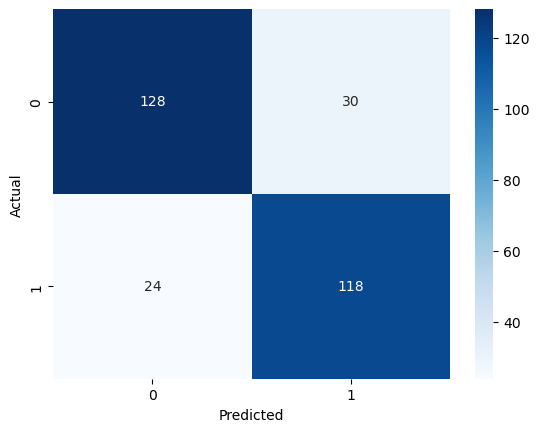

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
con_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(con_mat, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
'''from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_train, y_train, cv = 10)'''

'from sklearn.model_selection import cross_val_score\ncross_val_score(clf, X_train, y_train, cv = 10)'